In [65]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

<h2>Soal Nomor 2 : Visualisasi</h2>

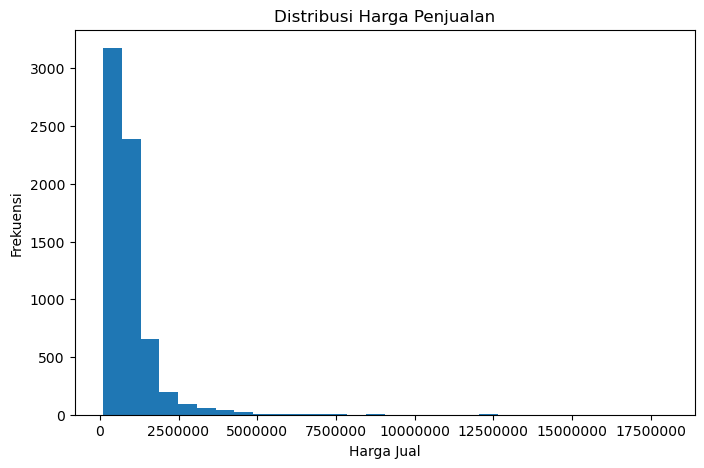

In [66]:
# Visualisasi 1 : Histogram Harga Penjualan

plt.figure(figsize=(8, 5))
plt.hist(data['sale.price'], bins=30)
plt.xlabel("Harga Jual")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Penjualan")
plt.ticklabel_format(scilimits=(-5, 8))
plt.show()

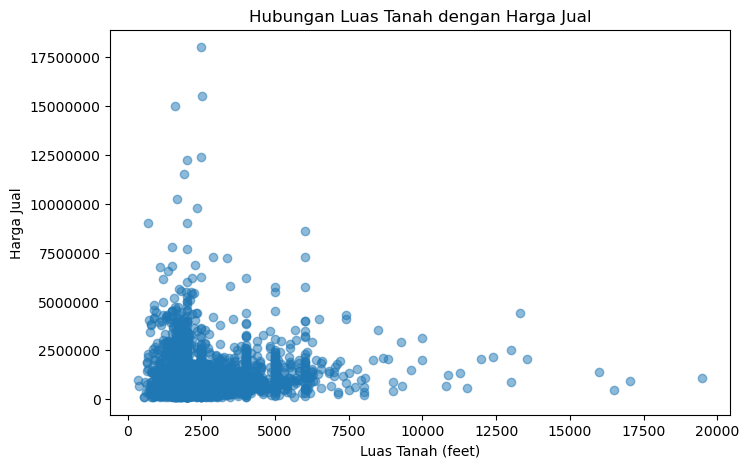

In [67]:
# Visualisasi 2 : Scatter Plot Luas Tanah dengan Harga Jual

plt.figure(figsize=(8, 5))
plt.scatter(data['land.square.feet'], data['sale.price'], alpha=0.5)
plt.xlabel("Luas Tanah (feet)")
plt.ylabel("Harga Jual")
plt.title("Hubungan Luas Tanah dengan Harga Jual")
plt.ticklabel_format(scilimits=(-5, 8))
plt.show()

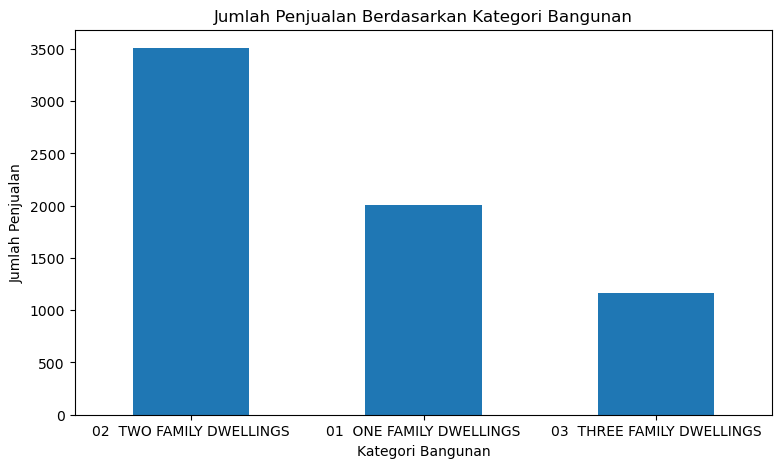

In [68]:
# Visualisasi 3 : Bar Plot Jumlah Penjualan Berdasarkan Kategori

building_category = data['building.class.category'].value_counts()

plt.figure(figsize=(9, 5))
building_category.plot(kind='bar')
plt.xlabel('Kategori Bangunan')
plt.ylabel('Jumlah Penjualan')
plt.title('Jumlah Penjualan Berdasarkan Kategori Bangunan')
plt.xticks(rotation=0)
plt.show()

<h2>Soal Nomor 3 : Case</h2>

In [79]:
# 3 daerah termahal dan termurah harga rumah

mean_termahal = data.groupby('neighborhood')['sale.price'].mean()
mean_termurah = data.groupby('neighborhood')['sale.price'].mean()

daerah_termahal = mean_termahal.sort_values(ascending=False).head(3)
daerah_termurah = mean_termurah.sort_values().head(3)

print('Daerah Termahal')
print(daerah_termahal)
print('\nDaerah Termurah')
print(daerah_termurah)

Daerah Termahal
neighborhood
BROOKLYN HEIGHTS             6.379000e+06
BROOKLYN-UNKNOWN             4.579000e+06
COBBLE HILL                  4.527826e+06
Name: sale.price, dtype: float64

Daerah Termurah
neighborhood
BROWNSVILLE                  368538.048780
GERRITSEN BEACH              382671.226415
EAST NEW YORK                420083.964953
Name: sale.price, dtype: float64


In [70]:
# Jenis property yang paling banyak di jual di Brooklyn tahun 2015

data['sale.date'] = pd.to_datetime(data['sale.date'], format="%m/%d/%y")

data_2015 = data[data['sale.date'].dt.year.isin([2015])]

jenis_properti_terbanyak = data_2015['building.class.category'].value_counts().idxmax()

print("Jenis properti yang paling banyak dijual di Brooklyn tahun 2015 adalah:", jenis_properti_terbanyak)

Jenis properti yang paling banyak dijual di Brooklyn tahun 2015 adalah: 02  TWO FAMILY DWELLINGS


In [71]:
# Trend penjualan property di tahun 2015 

year_built_group = data_2015['year_group'].value_counts()
year_built_group

< 1940         5052
1940 - 1979    1001
> 1979          484
Name: year_group, dtype: int64

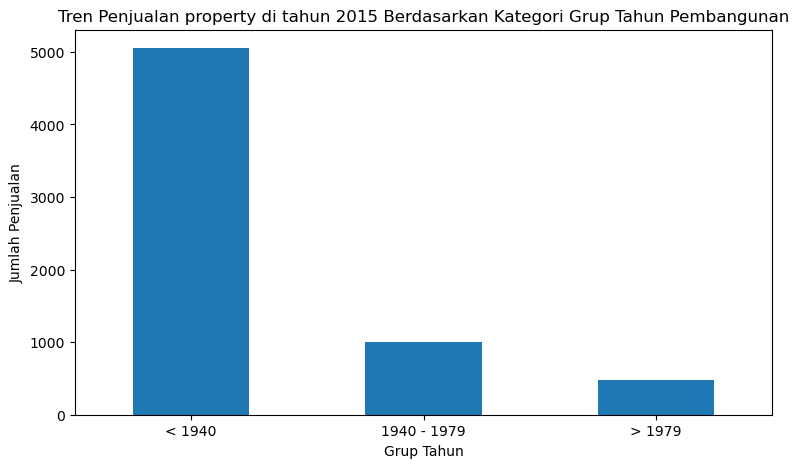

In [72]:
# Plot Trend penjualan property di tahun 2015 

plt.figure(figsize=(9, 5))
year_built_group.plot(kind='bar')
plt.xlabel('Grup Tahun')
plt.ylabel('Jumlah Penjualan')
plt.title('Tren Penjualan property di tahun 2015 Berdasarkan Kategori Grup Tahun Pembangunan')
plt.xticks(rotation=0)
plt.show()

In [73]:
# Persamaan regresi untuk menjelaskan bagaimana gross.square.feet dan total.units mempengaruhi harga property

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_linear = data
X = data_linear[['gross.square.feet', 'total.units']]
y = data_linear['sale.price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coef = regressor.coef_
intercept = regressor.intercept_

print("Persamaan Regresinya yaitu harga property = {:.3f} x gross.square.feet + ({:.3f}) x total.units + {:.3f}".format(coef[0],coef[1],intercept))

Persamaan Regresinya yaitu harga property = 302.649 x gross.square.feet + (-253581.871) x total.units + 720668.628


<h2>Soal Nomor 4 : Confidence Interval</h2>

In [74]:
import math

p = 30/100
n = 200

mean = n * p
standard_deviation = math.sqrt(n * p * (1 - p))

z_score = 1.96
margin_of_error = z_score * standard_deviation

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

interested_lower_bound = round(lower_bound)
interested_upper_bound = round(upper_bound)

print(f"Interval kepercayaan 95% untuk jumlah orang yang tertarik hari ini adalah antara {interested_lower_bound} dan {interested_upper_bound}")

Interval kepercayaan 95% untuk jumlah orang yang tertarik hari ini adalah antara 47 dan 73


<h2>Soal Nomor 5 : Regression model</h2>

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

Xe = data[['borough','residential.units','commercial.units','total.units','year.built','tax.class.at.time.of.sale','gross.square.feet','land.square.feet','furnished.at.time.of.sale']]
ye = data['sale.price']

X_tr, X_tst, y_tr, y_tst = train_test_split(Xe, ye, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_tr, y_tr)

y_train_pred = model.predict(X_tr)
y_test_pred = model.predict(X_tst)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Train R^2 score:", r2_score(y_train, y_train_pred))
print("Test R^2 score:", r2_score(y_test, y_test_pred))

Train MSE: 811728629378.2549
Test MSE: 953908131584.9526
Train R^2 score: -0.12974330401172773
Test R^2 score: -0.15234514394679954


In [76]:
coefficients = pd.DataFrame({'Attribute': Xe.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                   Attribute    Coefficient
6          gross.square.feet     365.075882
0                    borough       0.000000
5  tax.class.at.time.of.sale       0.000000
7           land.square.feet     -15.913341
4                 year.built   -3684.610091
2           commercial.units  -33103.537384
8  furnished.at.time.of.sale  -49103.399544
1          residential.units -140252.053188
3                total.units -173355.590572
